In [1]:
import pandas as pd
import os
from pandas_gbq import to_gbq, read_gbq
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

#### Reccuepration des parametres

In [2]:
os.chdir("/PARIS_OPENDATA_GCP/Workspace/Velib")

%run ../Commun/Params.ipynb

In [3]:
BQ_SILVER_DATASET =  parametres["BQ_SILVER_DATASET"]
BQ_SILVER_TABLE = f"{BQ_SILVER_DATASET}.velib_emplacement_stations"

In [4]:
velib_emplacement_df = pd.read_gbq(BQ_SILVER_TABLE)

Velib_Geo_Data =  velib_emplacement_df[["Nom de la station", "Longitude", "Latitude"]]

In [7]:

# Convertir latitude/longitude en objets Point
geometry = [Point(xy) for xy in zip(Velib_Geo_Data["Longitude"], Velib_Geo_Data["Latitude"])]

# Créer un GeoDataFrame avec CRS WGS84 (EPSG:4326)
gdf = gpd.GeoDataFrame(Velib_Geo_Data, geometry=geometry, crs="EPSG:4326")

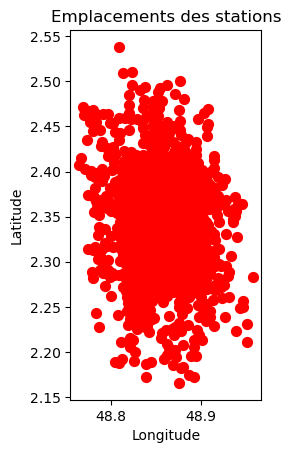

In [8]:
# Visualiser les points
gdf.plot(marker='o', color='red', markersize=50)

plt.title("Emplacements des stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()